In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import datasets
from keras_tuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np
import pandas as pd
import seaborn as sns

c:\Users\konva\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Подготовка данных

In [4]:
# просмотрим тип объектов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# заменяем object на int
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
columns = ["date", "quarter", "department", "day"]
for column in columns:
    df[column] = lab.fit_transform(df[column])

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,0,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,0,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,51,1,0,5,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,51,1,0,5,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,51,1,0,5,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [6]:
# некоторые значения 'wip' равны nill
# просмотрим какие значения принимает этот параметр
df['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

In [7]:
# и заменим nill

df['wip'] = df['wip'].fillna(1252.5)

<AxesSubplot:>

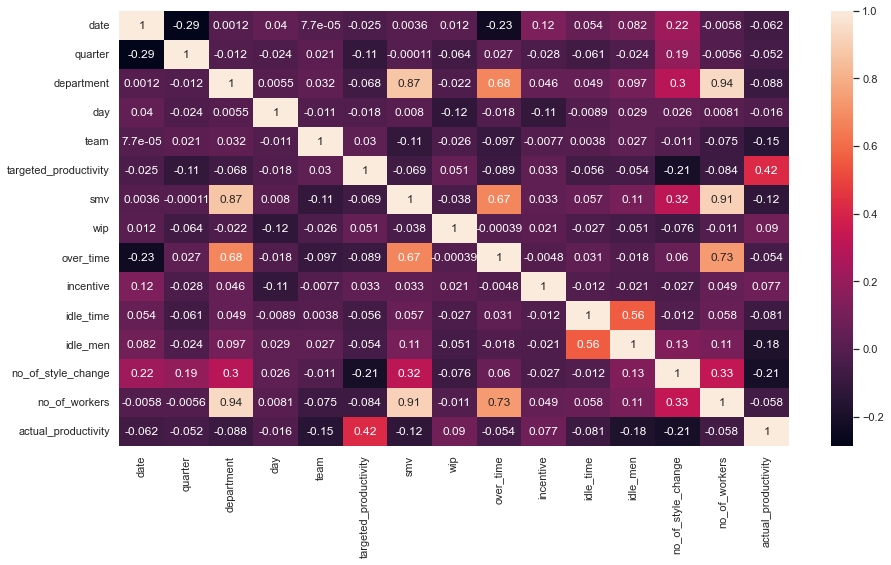

In [8]:
# проверим зависимости целевого признака от других

corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:>

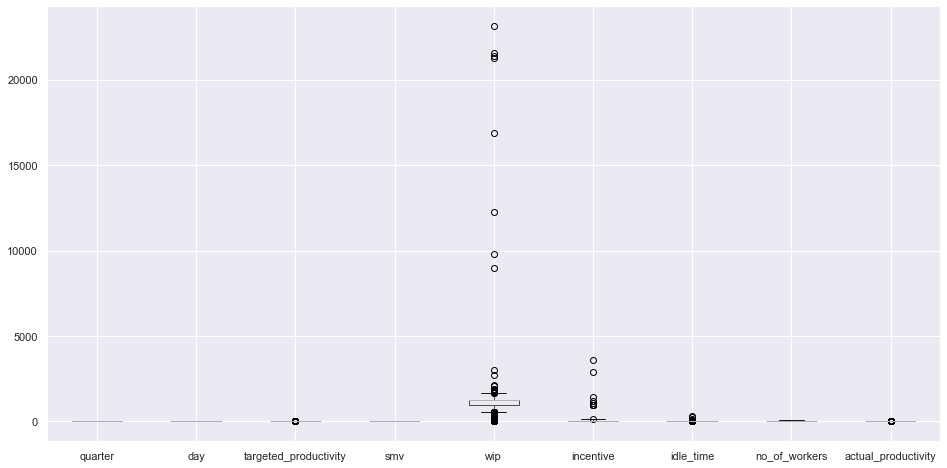

In [9]:
# проверим данные на наличие выбросов
df.boxplot(['quarter','day','targeted_productivity','smv','wip','incentive','idle_time','no_of_workers','actual_productivity'], figsize = (16, 8))

<AxesSubplot:>

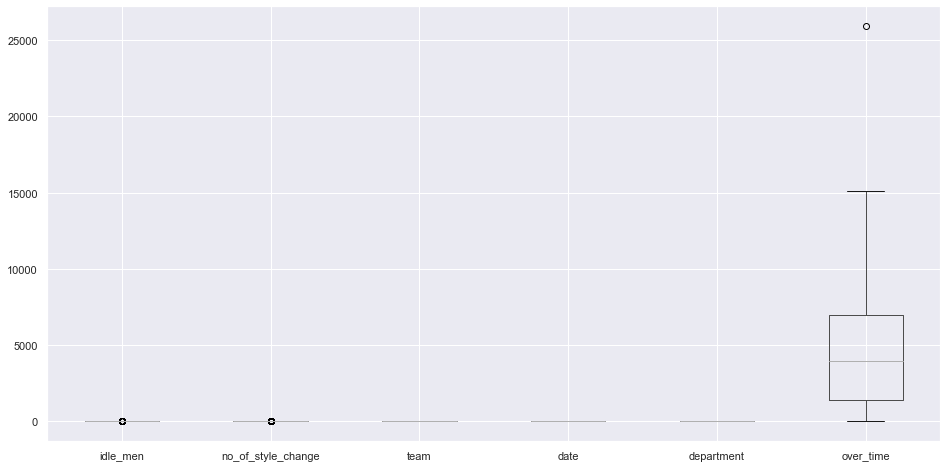

In [10]:
df.boxplot(['idle_men', 'no_of_style_change', 'team', 'date', 'department', 'over_time'], figsize = (16, 8))

In [11]:
columns_check = ['incentive']

for column in columns_check:
       for x in [column]:
              q75,q25 = np.percentile(df.loc[:,x],[75,25])
              dif = q75-q25

              max = q75 + (1.5 * dif)
              min = q25 - (1.5 * dif)

              df.loc[df[x] < min, x] = np.nan
              df.loc[df[x] > max, x] = np.nan
    
df.isnull().sum()

date                      0
quarter                   0
department                0
day                       0
team                      0
targeted_productivity     0
smv                       0
wip                       0
over_time                 0
incentive                11
idle_time                 0
idle_men                  0
no_of_style_change        0
no_of_workers             0
actual_productivity       0
dtype: int64

In [12]:
df = df.dropna(axis = 0)
df.isnull().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [13]:
data = df.iloc[:,:-1]               # выделяем признаки
target = df.iloc[:, -1].values      # выделяем целевой признак

In [14]:
target

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

In [15]:
# разделяем выборку на тренироваочную и тестувую
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

In [20]:
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',
                                   min_value=10,
                                   max_value=1024,
                                   step=32),
                    input_dim=14,
                    activation=activation_choice))
    for i in range(hp.Int('num_layers', min_value=2, max_value=5)):
      model.add(Dense(units=hp.Int('units_hidden',     
                                   min_value=10,   
                                   max_value=600,   
                                   step=32),
                      activation=activation_choice))   
    model.add(Dense(1, activation='tanh'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']),
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])
    return model

In [21]:
tuner = RandomSearch(
    build_model,                 # функция создания модели
    objective='mean_absolute_error',    # метрика, которую нужно оптимизировать - 
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=20,               # максимальное количество запусков обучения 
    directory='test_directory'   # каталог, куда сохраняются обученные сети  
    )

INFO:tensorflow:Reloading Oracle from existing project test_directory\untitled_project\oracle.json


In [22]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 1024, 'step': 32, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [23]:
tuner.search(x_train,                  # Данные для обучения
             y_train,                  # Правильные ответы
             batch_size=8,           # Размер мини-выборки
             epochs=5,                # Количество эпох обучения 
             validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
             )

Trial 20 Complete [00h 00m 05s]
mean_absolute_error: 0.12933886051177979

Best mean_absolute_error So Far: 0.12933886051177979
Total elapsed time: 00h 01m 47s
INFO:tensorflow:Oracle triggered exit


In [24]:
tuner.results_summary()

Results summary
Results in test_directory\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: tanh
units_input: 714
num_layers: 4
units_hidden: 42
optimizer: SGD
Score: 0.12933886051177979
Trial summary
Hyperparameters:
activation: tanh
units_input: 778
num_layers: 3
units_hidden: 10
optimizer: adam
Score: 0.13171075284481049
Trial summary
Hyperparameters:
activation: tanh
units_input: 298
num_layers: 5
units_hidden: 298
optimizer: SGD
Score: 0.13268308341503143
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 874
num_layers: 2
units_hidden: 522
optimizer: SGD
Score: 0.13360543549060822
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 970
num_layers: 4
units_hidden: 202
optimizer: SGD
Score: 0.13391070067882538
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 362
num_layers: 5
units_hidden: 298
optimizer: adam
Score: 0.13448579609394073
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 362
num_lay

In [25]:
models = tuner.get_best_models(num_models=3)

In [26]:
for model in models:
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 714)               10710     
_________________________________________________________________
dense_1 (Dense)              (None, 42)                30030     
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_4 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 43        
Total params: 46,201
Trainable params: 46,201
Non-trainable params: 0
____________________________________________________